# Playground for Logisitic Regression
___

Plan of action: 
* create logistic regression model
* load in data
* Split data into test/validation dataset
* create submission
___

In [17]:
%pylab inline
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from preprocess import loadPreData
from preprocess import scoreAUC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
subm_folder = './submissions'

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Import data
___

In [5]:
data = loadPreData()

Index([u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')
Index([u'Id', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy'],
      dtype='object')


In [6]:
X = data['train'].get_values().astype(float)
Y = data['labels']

## Split into train/validation set
___

In [9]:
# split data into train and test sets
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train model
___

In [11]:
logreg = LogisticRegression(C=1e5)

In [15]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
preds = model.predict(X_test)

## Plot AUC on validation data
___

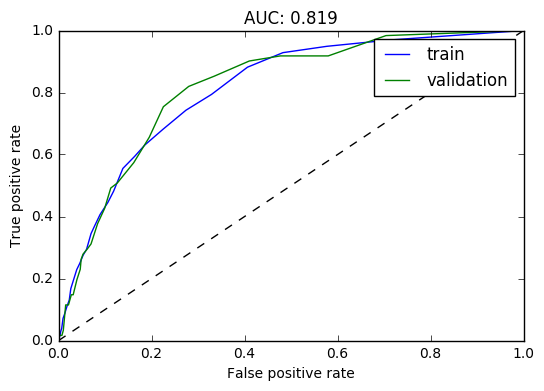

In [21]:
probs = model.predict_proba(X_train)
auc = scoreAUC(y_train,probs)
plt.plot(auc['fpr'],auc['tpr'],label='train');

probs = model.predict_proba(X_test)
auc = scoreAUC(y_test,probs)
plt.plot(auc['fpr'],auc['tpr'],label='validation');

plt.legend();

plt.plot([0,1.],[0,1.],'k--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');


plt.title('AUC: {:.3f}'.format(auc['score']));

## Prepare submission
___

In [20]:
X_sub = data['test'].get_values()
probs = model.predict_proba(X_sub)
#prepare submission
ss = pd.DataFrame(columns=['Id','WnvPresent'])
ss['WnvPresent'] = pd.Series(probs[:,1])
ss['Id'] = data['test'].index + 1
ss.to_csv(os.path.join(subm_folder, 'lg_submission.csv'), index=False)

Gives a score of 0.69919, so around 733rd